In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from lib.tf_util.systems import system_from_str
from train_dsn import train_dsn
import seaborn as sns
import pandas as pd

In [3]:
system_str = 'normal';
D = 3;
T = 1;
behavior_str = 'moments';

system_class = system_from_str(system_str);
system = system_class(D, T, behavior_str);
print(system.name)

normal


/Users/sbittner/Library/Python/3.6/lib/python/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


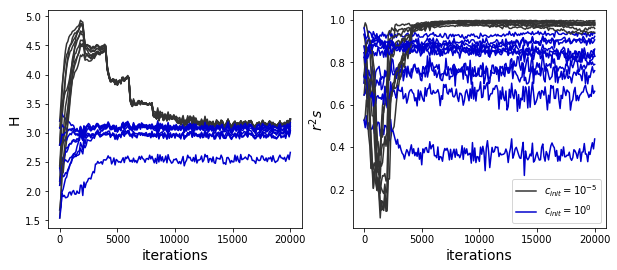

In [17]:
fontsize = 14;
random_seed = 0;
savedir = '/Users/sbittner/Documents/dsn/notebooks/results/convergence_test/';
c_init_orders = [-5];
gray = [.2, .2, .2];
blue = [0.0, 0.0, 0.8];
colors = [gray, blue]
num_c_inits = len(c_init_orders);
num_rs = 1;
plt.figure(figsize=(10,4));
for rs in range(num_rs):
    for i in range(num_c_inits):
        c_init_order = c_init_orders[i];
        fname = savedir + 'normal_D=2_T=1_flow=4P_lr_order=-3_c=%d_rs=%d/results.npz' % (c_init_order, rs);
        npzfile = np.load(fname);
        
        check_rate = npzfile['check_rate'];
        costs = npzfile['costs'];
        Hs = npzfile['Hs'];
        R2s = npzfile['R2s'];
        T_phis = npzfile['T_phis'];
        mu = npzfile['mu'];
        behavior = npzfile['behavior'];
        nits = costs.shape[0];
        iterations = np.arange(0, check_rate*nits, check_rate);
        
        plt.subplot(1,2,1);
        plt.plot(iterations, Hs, c=colors[i]);
        plt.xlabel('iterations', fontsize=fontsize);
        plt.ylabel('H', fontsize=fontsize);
        
        plt.subplot(1,2,2);
        plt.plot(iterations, R2s, c=colors[i]);
        plt.xlabel('iterations', fontsize=fontsize);
        plt.ylabel(r'$r^2$', fontsize=fontsize);
        
plt.legend([r'$c_{init} = 10^{%d}$' % c_init_orders[0], r'$c_{init} = 10^{%d}$' % c_init_orders[1]])
plt.show();


/Users/sbittner/Library/Python/3.6/lib/python/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


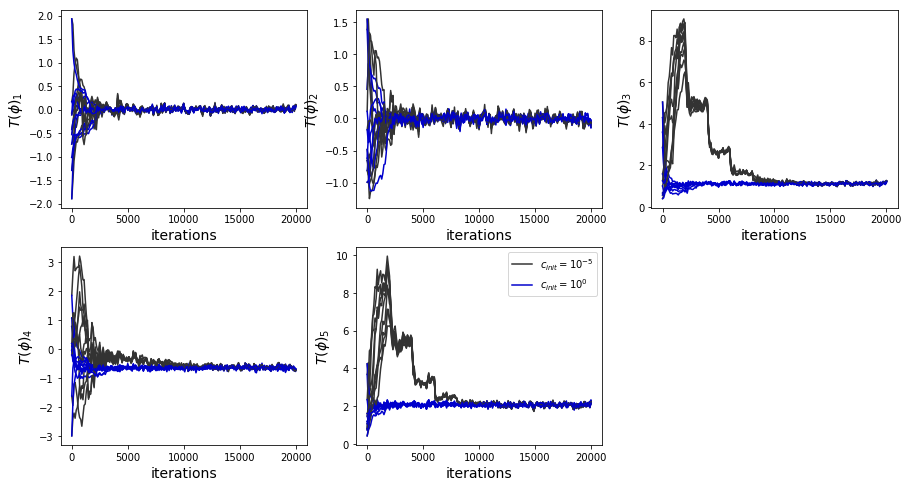

In [21]:
fontsize = 14;
random_seed = 0;
savedir = '/Users/sbittner/Documents/dsn/notebooks/results/convergence_test/';
c_init_orders = [-5, 0];
gray = [.2, .2, .2];
blue = [0.0, 0.0, 0.8];
colors = [gray, blue]
num_c_inits = len(c_init_orders);
num_rs = 10;
plt.figure(figsize=(15,8));
for rs in range(num_rs):
    for i in range(num_c_inits):
        c_init_order = c_init_orders[i];
        fname = savedir + 'normal_D=2_T=1_flow=4P_lr_order=-3_c=%d_rs=%d/results.npz' % (c_init_order, rs);
        npzfile = np.load(fname);
        
        check_rate = npzfile['check_rate'];
        costs = npzfile['costs'];
        T_phis = npzfile['T_phis'];
        mu = npzfile['mu'];
        behavior = npzfile['behavior'];
        nits = costs.shape[0];
        iterations = np.arange(0, check_rate*nits, check_rate);
        
        for j in range(5):
            plt.subplot(2,3,j+1);
            plt.plot(iterations, T_phis[:,j], c=colors[i]);
            plt.xlabel('iterations', fontsize=fontsize);
            plt.ylabel(r'$T(\phi)_%d$' % (j+1), fontsize=fontsize);
        
        
plt.legend([r'$c_{init} = 10^{%d}$' % c_init_orders[0], r'$c_{init} = 10^{%d}$' % c_init_orders[1]])
plt.show();


In [5]:
T_phis = npzfile['T_phis'];
cs = npzfile['cs'];
lambdas = npzfile['lambdas'];
phis = npzfile['phis'];
log_q_phis = npzfile['log_q_phis'];
tr_hess = npzfile['trace_hessian']

zero_inds = np.where(phis[:,0,0] == 0.0)[0];
if (len(zero_inds) > 0):
    last_ind = zero_inds[0]-1;
else:
    last_ind = phis.shape[0]-1;
print(last_ind);

KeyError: 'trace_hessian is not a file in the archive'

(10, 1000, 4)
(10, 1000)
(10, 1000)


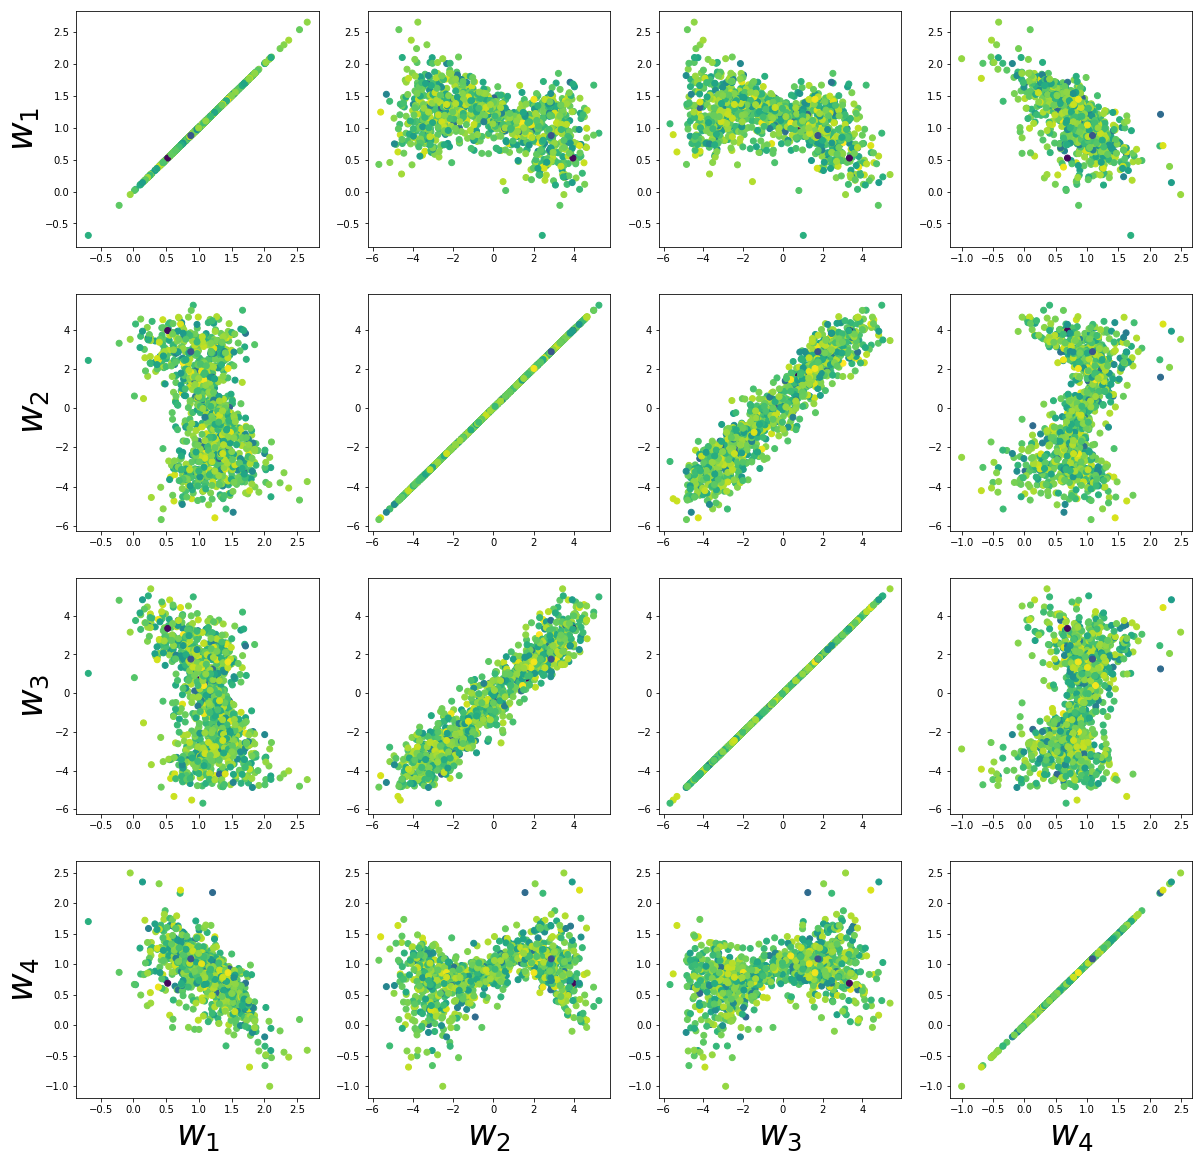

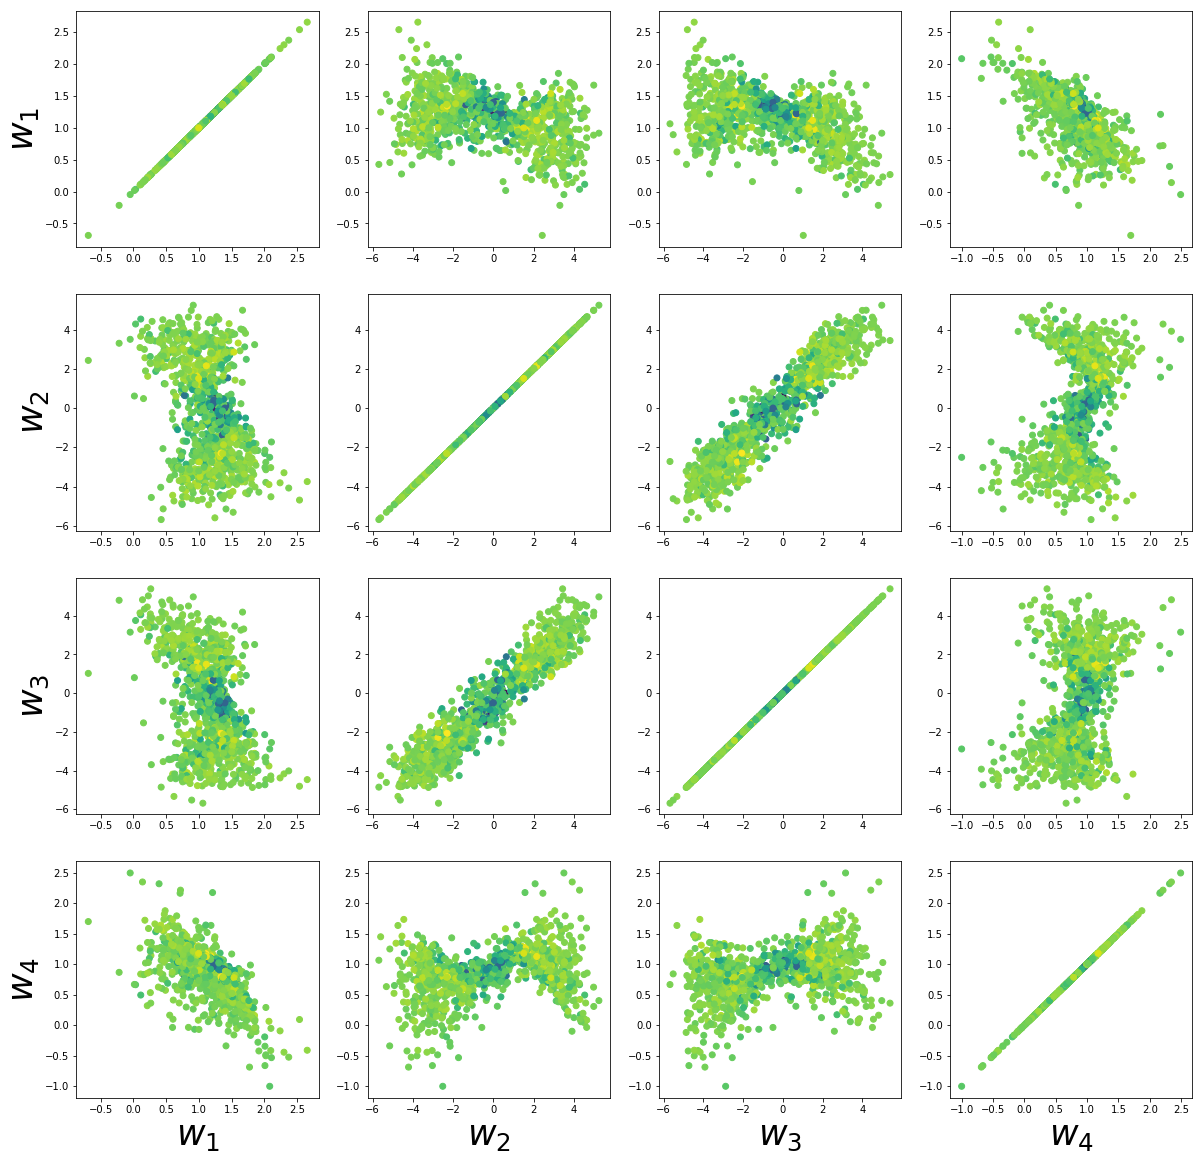

In [6]:
print(phis.shape);
print(tr_hess.shape);
print(log_q_xs.shape);
fontsize = 35;
figsize = (20, 20);
plt.figure(figsize=figsize);
for i in range(system.D):
    for j in range(system.D):
        ind = system.D*i + j + 1;
        plt.subplot(system.D, system.D, ind);
        plt.scatter(phis[last_ind,:,j], phis[last_ind, :, i], c=log_q_xs[last_ind]);
        if (i==3):
            plt.xlabel(r'$w_%d$' % (j+1), fontsize=fontsize);
        if (j==0):
            plt.ylabel(r'$w_%d$' % (i+1), fontsize=fontsize);
#plt.colorbar();
        
plt.show();


plt.figure(figsize=figsize);
for i in range(system.D):
    for j in range(system.D):
        ind = system.D*i + j + 1;
        plt.subplot(system.D, system.D, ind);
        plt.scatter(phis[last_ind,:,j], phis[last_ind, :, i], c=tr_hess[last_ind]);
        if (i==3):
            plt.xlabel(r'$w_%d$' % (j+1), fontsize=fontsize);
        if (j==0):
            plt.ylabel(r'$w_%d$' % (i+1), fontsize=fontsize);
#plt.colorbar();
plt.show();